# Latest Mark 11

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from copy import deepcopy
import shapely.geometry as shapgeo

In [2]:
def read_files(ddir):
    images = dict()
    ACCEPTED_FORMAT = ['jpg', 'png']
    for d in sorted(os.listdir(ddir)):
        if d.split('.')[1].lower() in ACCEPTED_FORMAT:
            fname = d.split('.')[0]
            print(f'reading {os.path.join(ddir, d)}...')
            images[fname] = cv2.imread(os.path.join(ddir, d))
            images[fname] = cv2.cvtColor(images[fname], cv2.COLOR_BGR2RGB)
    return images

def display_all(imgs, subs=(10,10), fgsz=(15,18), use_gray=False):
    fig, axs = plt.subplots(subs[0], subs[1], figsize=fgsz)
    k = 0
    for i in range(subs[0]):
        for j in range(subs[1]):
            axs[i, j].imshow(list(imgs.values())[k], 'gray' if use_gray else None)
            axs[i, j].set_title(list(imgs.keys())[k])
            axs[i, j].axis('off')
            k+=1
            
def display_all_with(imgs, cc, subs=(10,10), fgsz=(15,18), use_gray=True):
    fig, axs = plt.subplots(subs[0], subs[1], figsize=fgsz)
    k = 0
    for i in range(subs[0]):
        for j in range(subs[1]):
            axs[i, j].imshow(list(imgs.values())[k][:,:,cc], cmap='gray' if use_gray else None)
            axs[i, j].set_title(list(imgs.keys())[k])
            axs[i, j].axis('off')
            k+=1
            
def save_plots(imgs, suptitle, savedir, subs=(10,10), fgsz=(15,18), use_gray=False):
    fig, axs = plt.subplots(subs[0], subs[1], figsize=fgsz)
    k = 0
    for i in range(subs[0]):
        for j in range(subs[1]):
            axs[i, j].imshow(list(imgs.values())[k], 'gray' if use_gray else None)
            axs[i, j].set_title(list(imgs.keys())[k])
            axs[i, j].axis('off')
            k+=1
    fig.suptitle(suptitle)
    fig.savefig(savedir)
    print(f'Figure is successfully saved at {savedir}')

def adjust_gamma(image, gamma=1.0):
    table = np.array([((i / 255.0) ** gamma) * 255
      for i in np.arange(0, 256)]).astype("uint8")

    return cv2.LUT(image, table)

In [3]:
def draw_od_line(imgs, roi_line, color):
    odlines = {}
    for img in imgs:
        odlines[img] = cv2.ellipse(imgs[img], 
                                   roi_line[img], 
                                   color, 
                                   3, 
                                   cv2.LINE_AA)
    return odlines

def draw_oc_line(imgs, roi_line, color):
    drawn_oc = {}
    
    for img in imgs:
        drawn_oc[img] = cv2.circle(imgs[img],roi_line[img][0],roi_line[img][1],color, 3)
    return drawn_oc

In [4]:
home = r'/Users/teguhsatya/Desktop/croco/mixed'

In [5]:
images = read_files(home)

reading /Users/teguhsatya/Desktop/croco/mixed/neg_1.jpg...
reading /Users/teguhsatya/Desktop/croco/mixed/neg_10.jpg...
reading /Users/teguhsatya/Desktop/croco/mixed/neg_100.jpg...
reading /Users/teguhsatya/Desktop/croco/mixed/neg_101.jpg...
reading /Users/teguhsatya/Desktop/croco/mixed/neg_102.jpg...
reading /Users/teguhsatya/Desktop/croco/mixed/neg_11.jpg...
reading /Users/teguhsatya/Desktop/croco/mixed/neg_12.jpg...
reading /Users/teguhsatya/Desktop/croco/mixed/neg_13.jpg...
reading /Users/teguhsatya/Desktop/croco/mixed/neg_14.jpg...
reading /Users/teguhsatya/Desktop/croco/mixed/neg_15.jpg...
reading /Users/teguhsatya/Desktop/croco/mixed/neg_16.jpg...
reading /Users/teguhsatya/Desktop/croco/mixed/neg_17.jpg...
reading /Users/teguhsatya/Desktop/croco/mixed/neg_18.jpg...
reading /Users/teguhsatya/Desktop/croco/mixed/neg_19.jpg...
reading /Users/teguhsatya/Desktop/croco/mixed/neg_2.jpg...
reading /Users/teguhsatya/Desktop/croco/mixed/neg_20.jpg...
reading /Users/teguhsatya/Desktop/croco

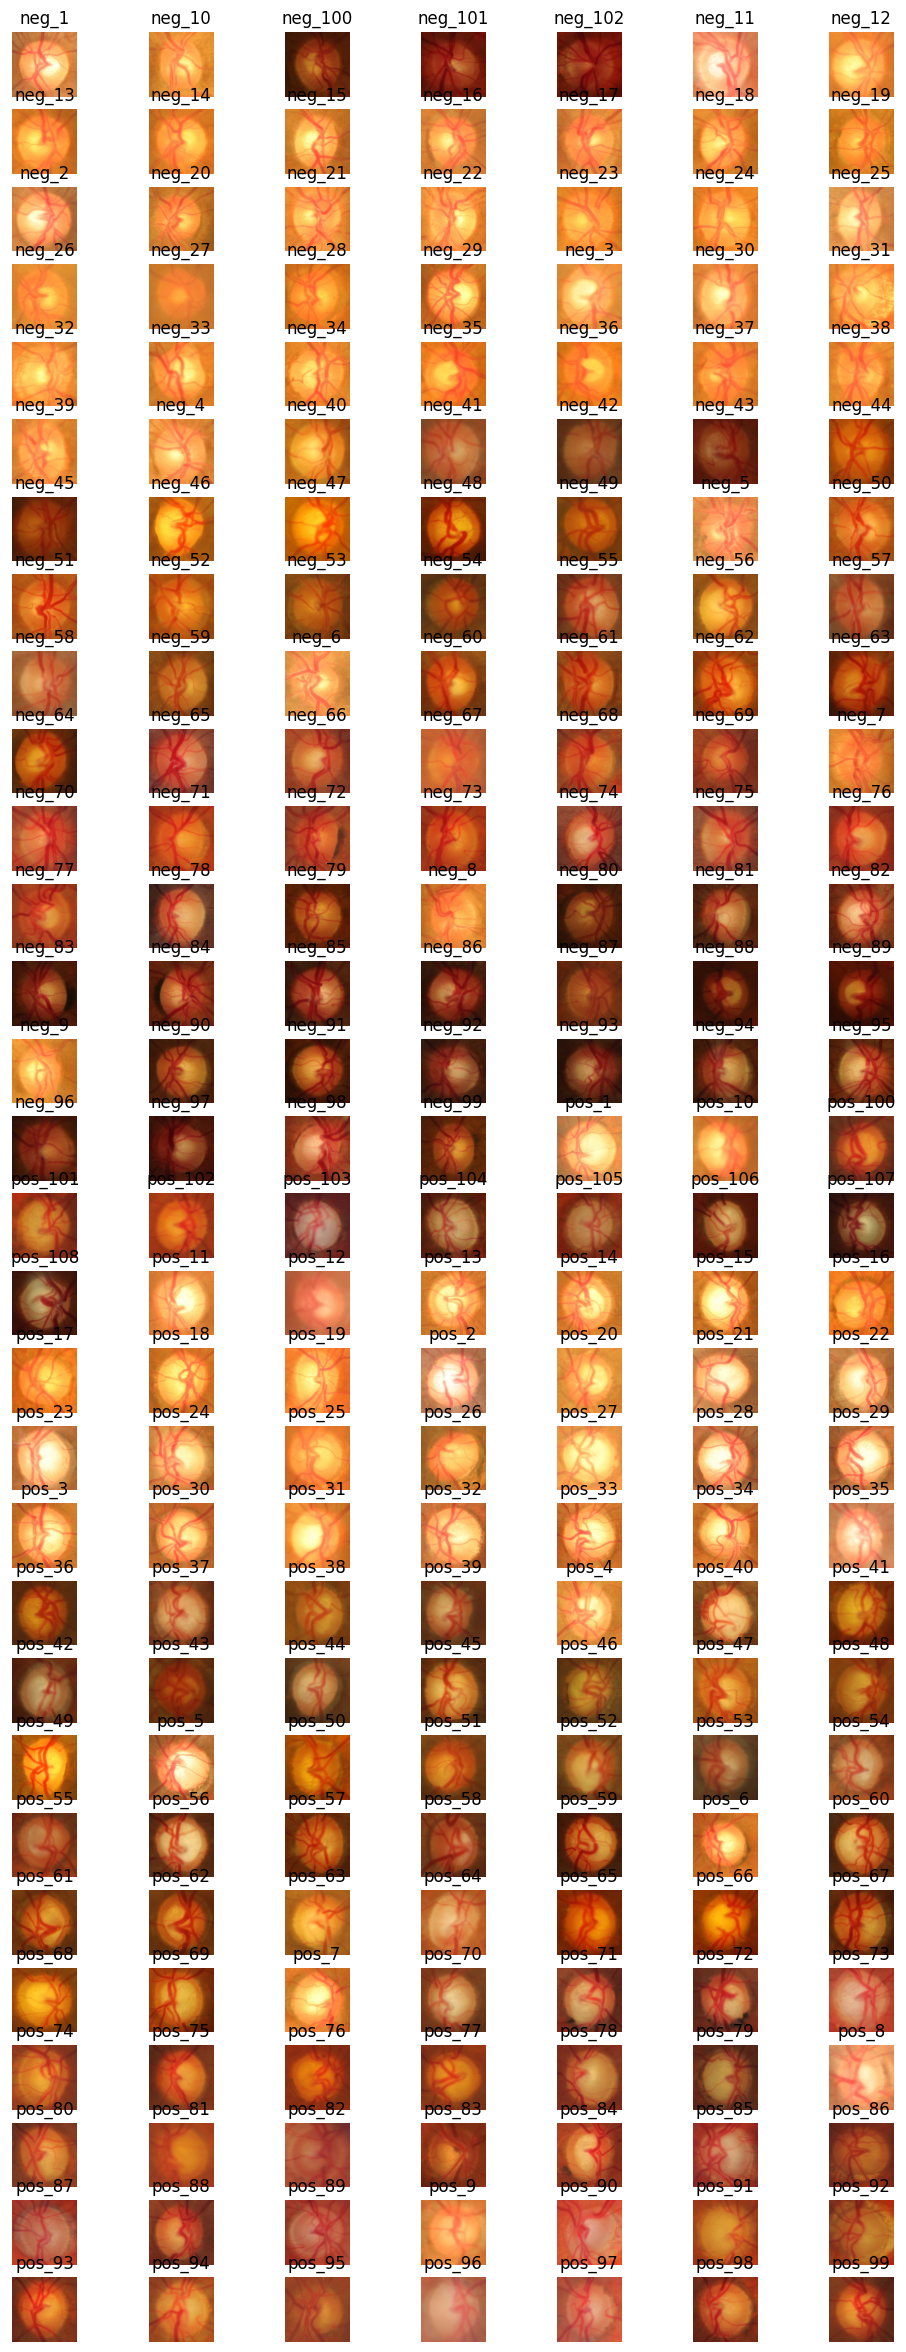

In [6]:
display_all(images, (30, 7), (12,30))

## Histogram Matching

In [7]:
IDEAL = r'/Users/teguhsatya/Desktop/Croco/mixed/pos_59.jpg'

In [8]:
ideal = cv2.imread(IDEAL)
ideal = cv2.cvtColor(ideal, cv2.COLOR_BGR2RGB)

In [9]:
from skimage.exposure import match_histograms

In [10]:
images_matched = {}
for image in images:
    images_matched[image] = match_histograms(images[image], ideal, multichannel=True)

/var/folders/zp/4lwldrsx6hqd2pm6w4s0wvg40000gn/T/ipykernel_97624/3803995021.py:3: FutureWarning: `multichannel` is a deprecated argument name for `match_histograms`. It will be removed in version 1.0. Please use `channel_axis` instead.
  images_matched[image] = match_histograms(images[image], ideal, multichannel=True)


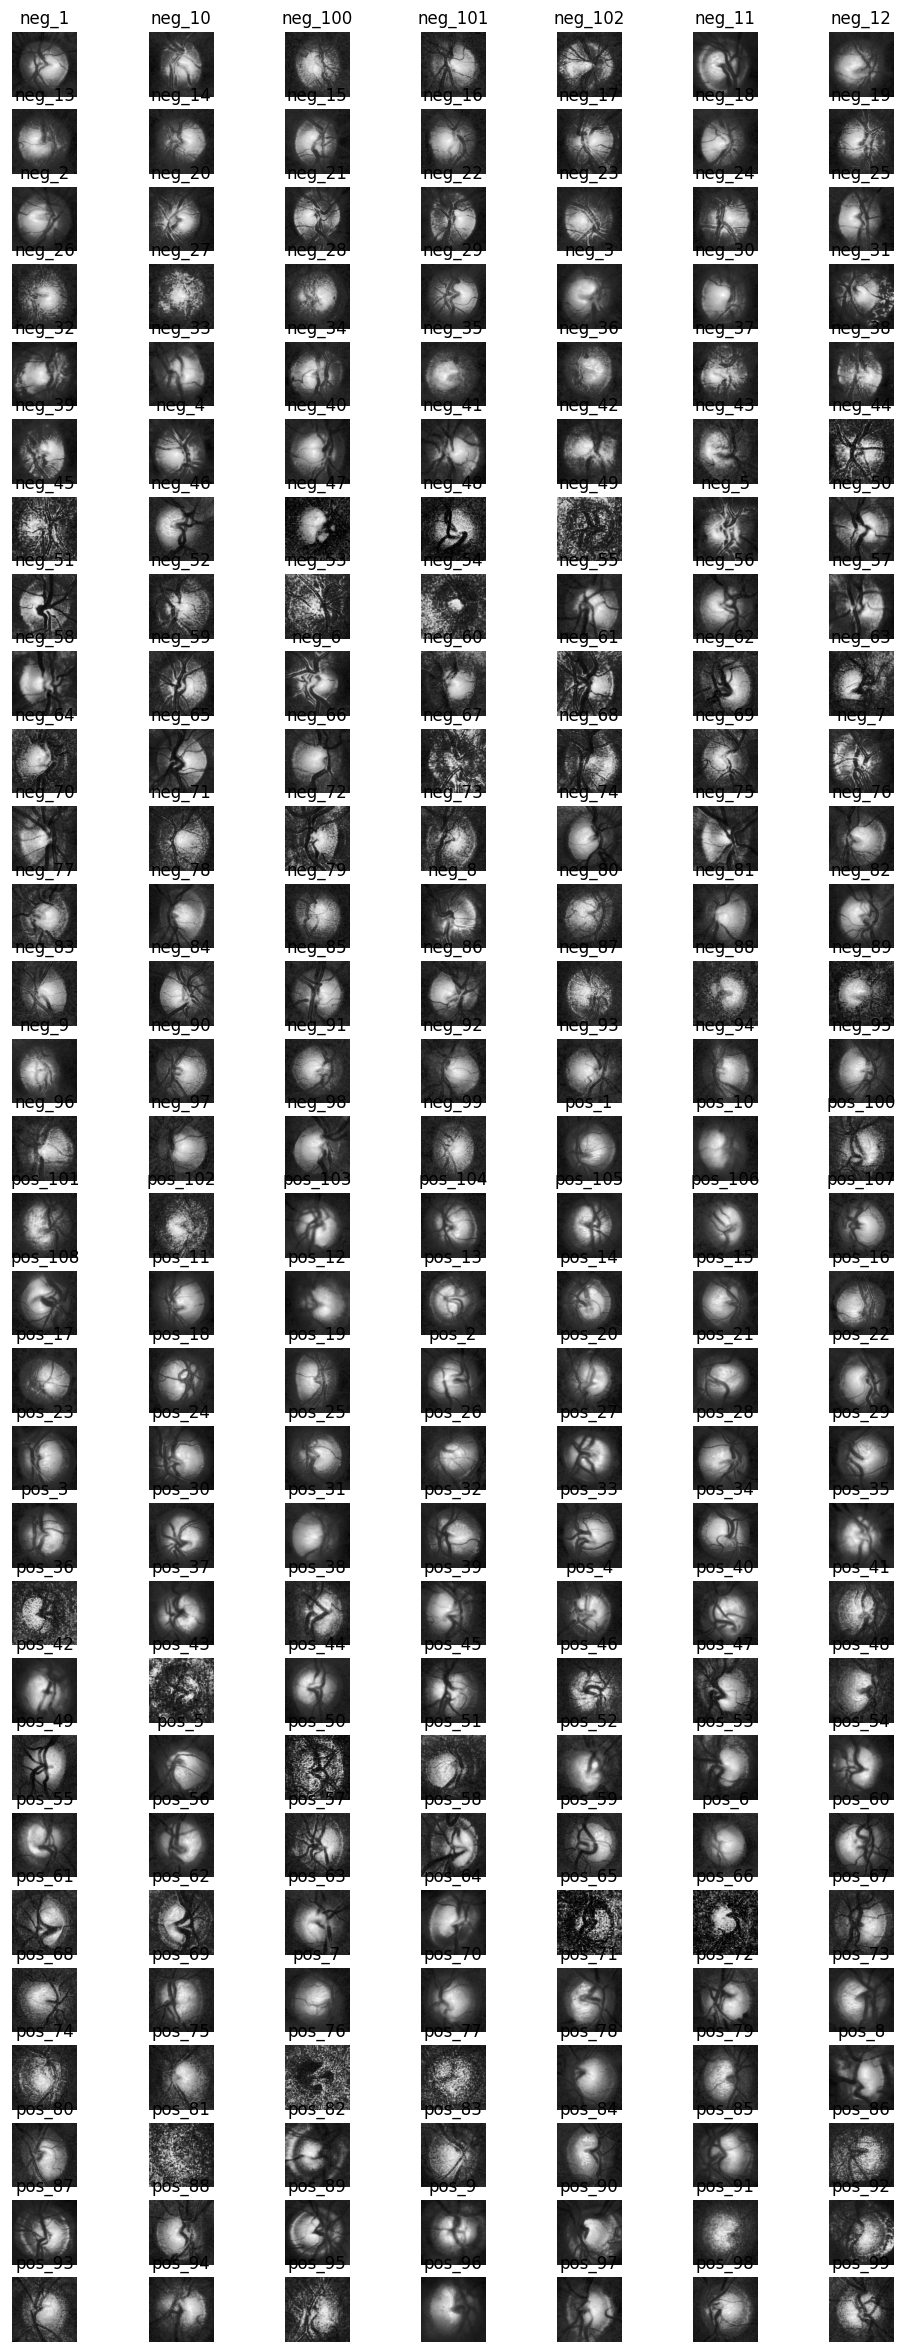

In [11]:
display_all_with(images_matched, 2, (30,7), (12,30))

## Extract OC

In [22]:
from skimage import exposure

In [131]:
def extract_oc(imgs):
    p = {}
    for img in imgs:
        green = imgs[img][:,:,1]
        percentiles = np.percentile(green, (0.5, 99.5))
        rescaled = exposure.rescale_intensity(green, in_range=tuple(percentiles))
        p[img] = rescaled
        # p[img] = cv2.convertScaleAbs(green, alpha=1, beta=80)
    
    display_all(p, (30,7), (10,40), True)
    return None, None

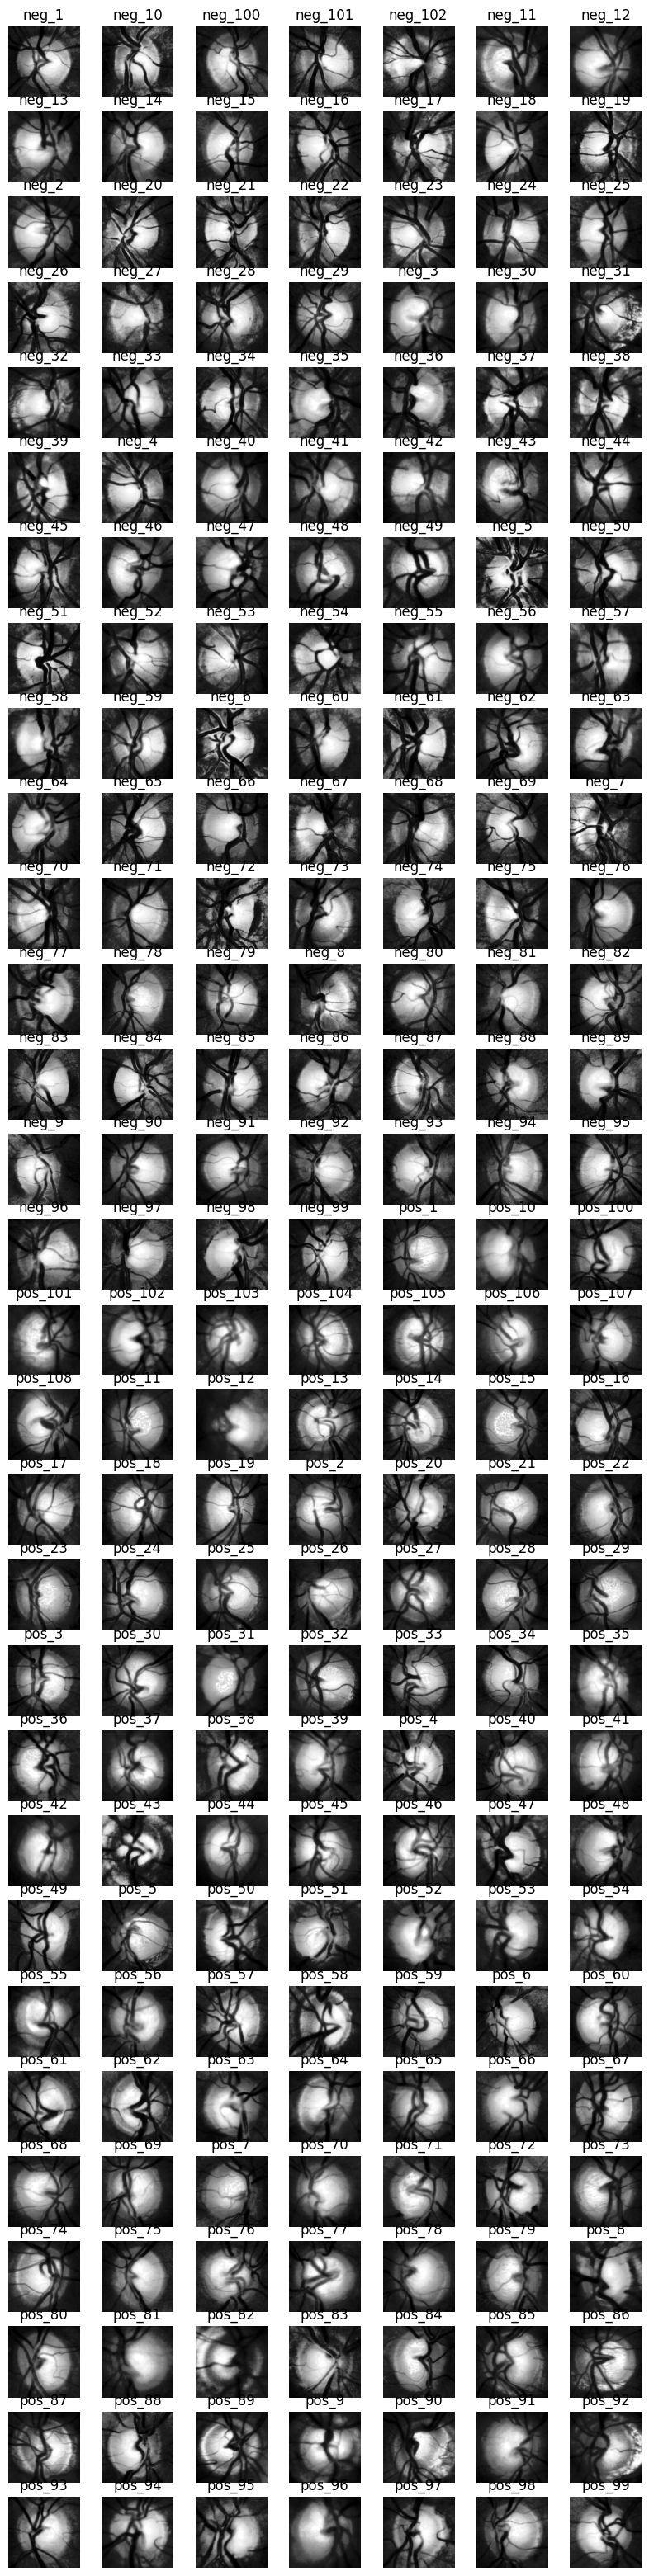

In [132]:
oc_boundaries, all_oc = extract_oc(images_matched)

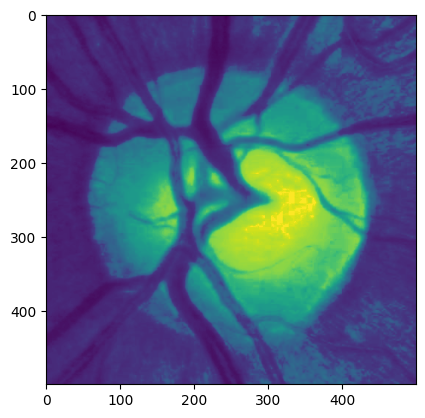

In [33]:
plt.imshow(images_matched['neg_1'][:,:,1])

In [34]:
sample = images_matched['neg_1'][:,:,1]

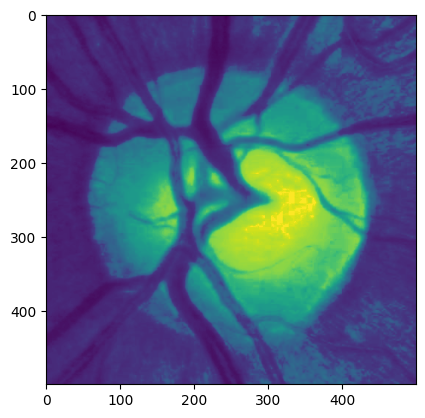

In [36]:
plt.imshow(sample)

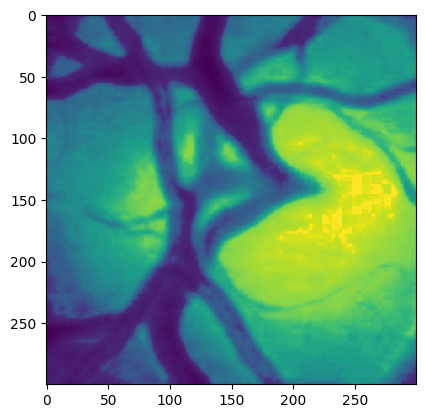

In [44]:
plt.imshow(sample[110:110+300, 80:80+300])